# **Практическое занятие 15. Методы кластеризации (задание 1 и 2)**

Коптев Данил

## **Задание 1**

В рамках этого задания нужно создать модельный набор данных в видеоблакаточек,написать программный код для выполнения кластеризации методом k-means и подобрать параметры для получения наилучшего результата;вывести центры полученных кластеров вместе с исходными точками.

**Подключим библиотеки**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score

1. Сгенерироватьнабор  данных в  виде  облака  из  1500  точек  с  тремя  центрами  и дисперсиями  1.0,  2.5,  0.5  (параметр cluster_std). Выполнить  визуализацию полученного облака.

In [17]:
# генерируем набор данных
X, y = make_blobs(n_samples = 1500, centers=3, cluster_std = [1.0, 2.5, 0.5], random_state = 42)

Text(0.5, 1.0, 'Сгенерированные облака точек')

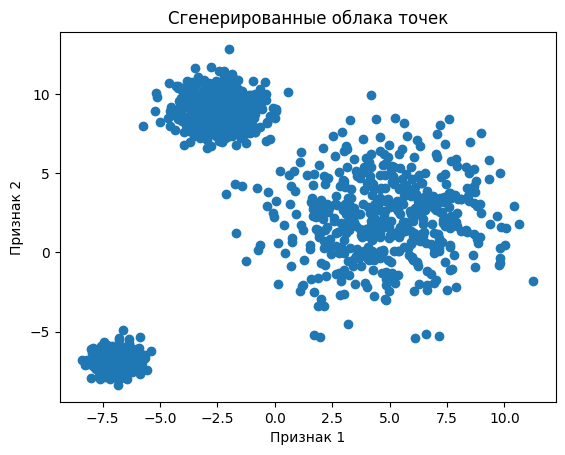

In [18]:
# визуализируем
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Сгенерированные облака точек')

2. Обучить алгоритм  кластеризации k-means(класс sklearn.cluster.KMeans), задавая  число  кластеров из  отрезка[2,  5]  (параметр n_clusters).  Вывести на диаграммах центры  кластеров  вместе  с  исходными  точками,  раскрашенными  в соответствии с полученными метками.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


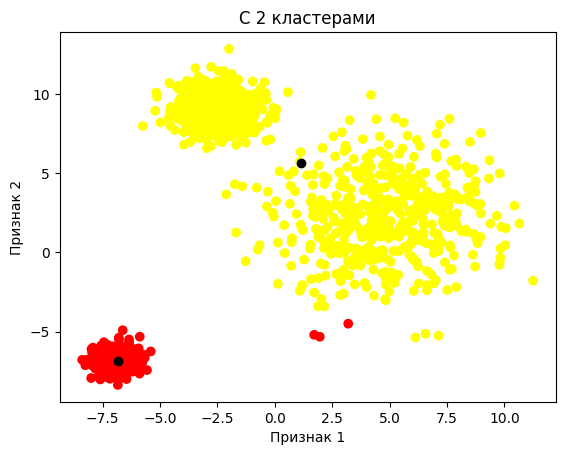

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


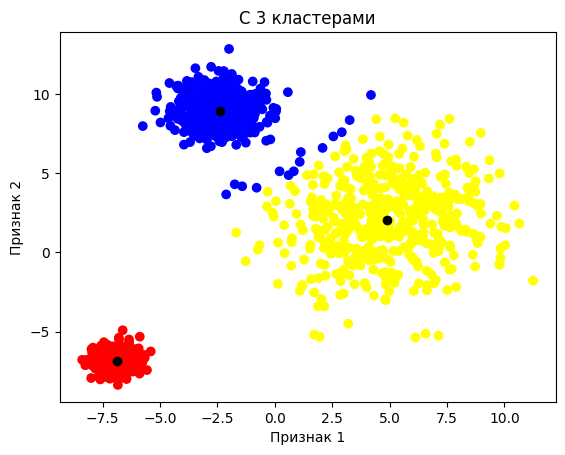

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


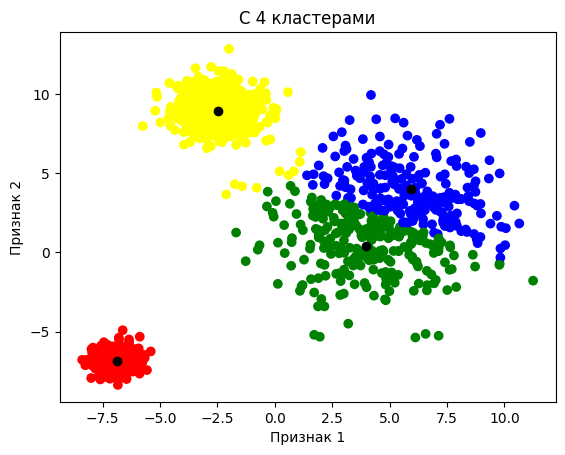

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


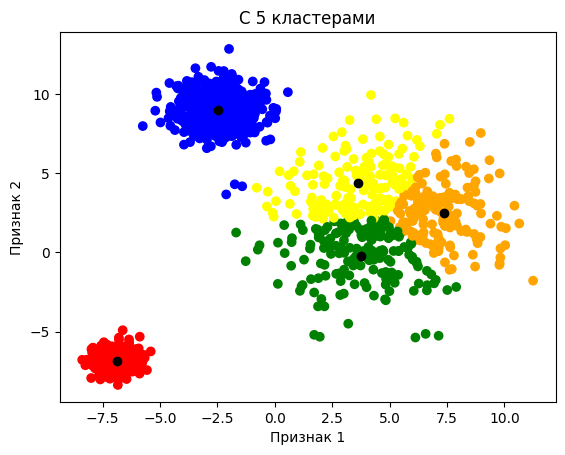

In [19]:
n_clusters_range = range(2, 6)

colors = [
    ['red', 'yellow'],
    ['red', 'yellow', 'blue'],
    ['red', 'yellow', 'blue', 'green'],
    ['red', 'yellow', 'blue', 'green', 'orange']
] 

for n_clusters in n_clusters_range:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
  lables = kmeans.labels_
  plt.scatter(X[:,0], X[:,1], cmap = ListedColormap(colors[n_clusters-2]), c = lables)
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
  plt.xlabel('Признак 1')
  plt.ylabel('Признак 2')
  plt.title(f'С {n_clusters} кластерами')
  plt.show()

3. Вычислить для  каждой из  полученных моделей  значенияметрик:  однородности, полноты, V-меры, ARI, силуэт.Дать интерпретацию полученным результатам.

In [20]:
print("-----------------------------------")
for n_clusters in n_clusters_range:
  kmeans = KMeans(n_clusters=n_clusters, n_init='auto', init='k-means++', random_state=108).fit(X)
  labels = kmeans.labels_

  print(f'С {n_clusters} кластерами:\n')
  print(f'Однородность: {homogeneity_score(y, labels)}')
  print(f'Полнота: {completeness_score(y, labels)}')
  print(f'V-мера: {v_measure_score(y, labels)}')
  print(f'ARI: {adjusted_rand_score(y, labels)}')
  print(f'Силуэт: {silhouette_score(X, labels)}')
  print("-----------------------------------")

-----------------------------------
С 2 кластерами:

Однородность: 0.569505273594467
Полнота: 0.9808337622818283
V-мера: 0.7206036708264554
ARI: 0.5681744448603613
Силуэт: 0.6887821840016362
-----------------------------------
С 3 кластерами:

Однородность: 0.9546279181278453
Полнота: 0.9549629316567869
V-мера: 0.9547953955053758
ARI: 0.9665398205289585
Силуэт: 0.7749927022206418
-----------------------------------
С 4 кластерами:

Однородность: 0.9677751262934352
Полнота: 0.8028256445951414
V-мера: 0.8776170239661159
ARI: 0.8526731707381017
Силуэт: 0.6929907085798224
-----------------------------------
С 5 кластерами:

Однородность: 0.992082789868875
Полнота: 0.7448486427265608
V-мера: 0.8508701099409803
ARI: 0.8205575191181387
Силуэт: 0.6783552915229641
-----------------------------------


**Интерпретация результатов:**


По однородности лучший кластер является со значением 5,  это означает, что кластеры имеют примерно одинаковый размах значений.

По полноте лучший кластер является со значением 3, это означает, что на каждый класс объектов более точно относится к одному кластеру.

По V-мере лучший кластер является со значением 3, это означает, что модель кластеризации имеет высокий уровень согласованности между кластерами.

По ARI лучший кластер является со значением 3, это означает, что кластеризация была хорошо выполнена с учетом того, что кластеры должны быть сбалансированными.

По силуэту лучший кластер является со значением 3, это означает, что каждый объект был хорошо отнесен к одному из кластеров

Таким образом, лучшим выбором количества кластеров будет считаться 3. Данное количество достигает наивысших значений среди метрик.

4. Для  оценки  оптимального  числа  кластеров использоватьвизуализациюсилуэтов объектов кластеров (как было показано в лекции).

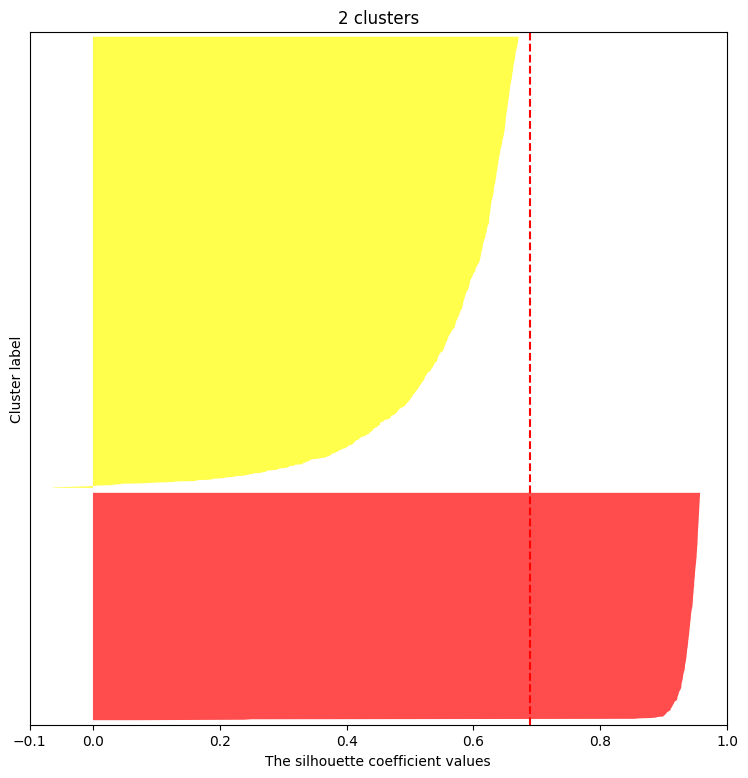

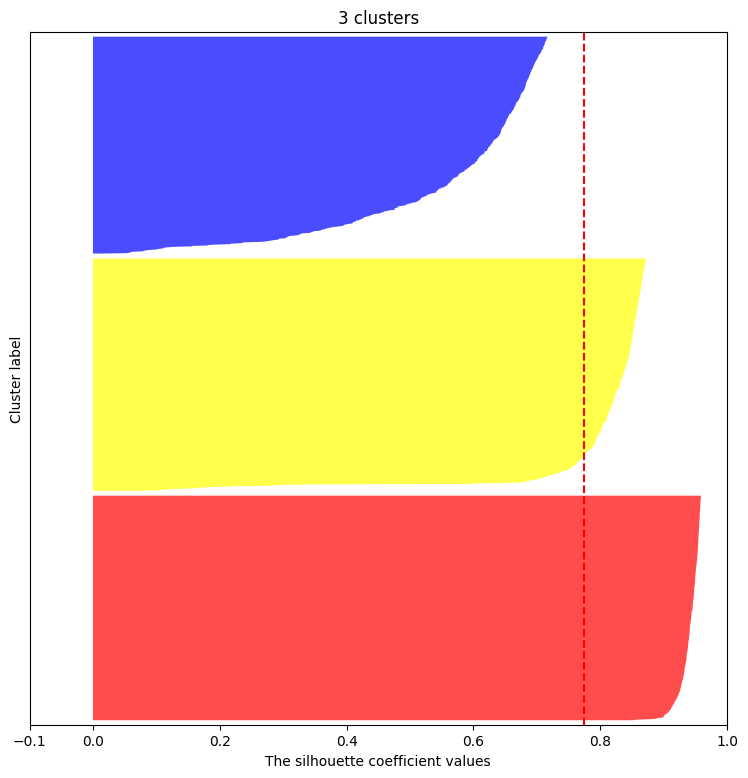

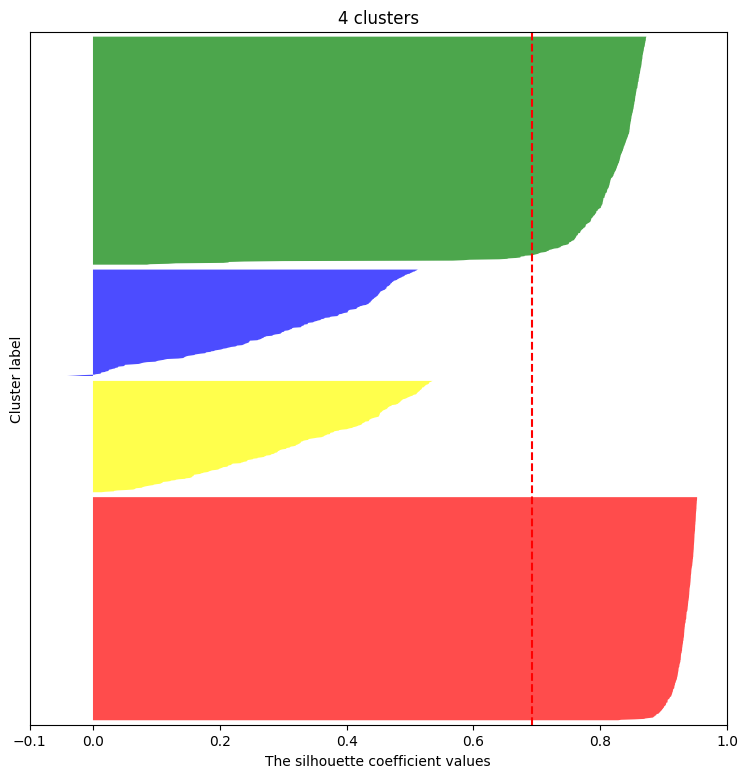

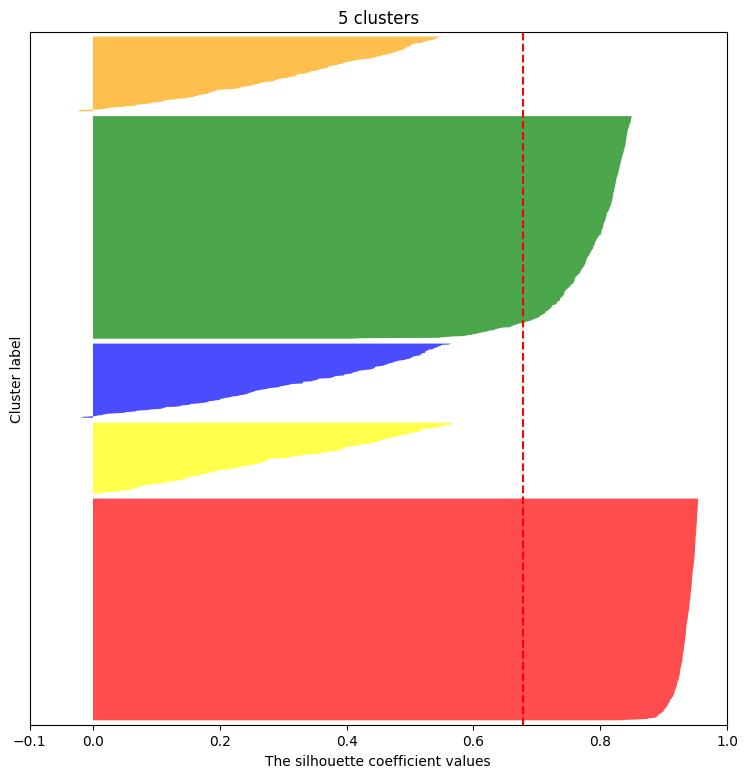

In [21]:
for n_clusters in n_clusters_range:
  kmeans = KMeans(n_clusters=n_clusters, n_init='auto', init='k-means++', random_state=108).fit(X)
  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_

  fig, (ax1) = plt.subplots(1, 1)
  fig.set_size_inches(9, 9)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  y_lower = 10
  sample_silhouette = silhouette_samples(X, labels) # Силуэт для каждого объекта
  for i in range(n_clusters):
    i_silhouette = sample_silhouette[labels == i]
    i_silhouette.sort()
    y_upper = y_lower + i_silhouette.shape[0]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, i_silhouette, facecolor=colors[n_clusters-2][i], alpha=0.7)
    y_lower = y_upper + 10

  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")
  ax1.set_title(str(n_clusters) + " clusters")
  ax1.axvline(x=np.average(sample_silhouette), color="red", linestyle="--") # Линия, показывающая среднее значение силуэта по выборке
  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

5. Вычислитьзначение Inertia для моделей с числом кластеров от 2 до 8 и построить график зависимости Inertia от числа кластеров.

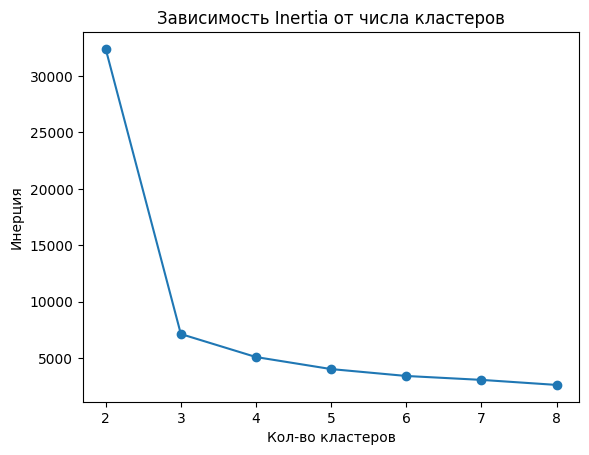

In [22]:
n_clusters_range = range(2, 9)
inertia = []

for n_clusters in n_clusters_range:
  kmeans = KMeans(n_clusters=n_clusters, n_init='auto', init='k-means++', random_state=108)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(n_clusters_range, inertia, 'o-')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Инерция')
plt.title('Зависимость Inertia от числа кластеров')
plt.show()

6. На основании результатов выполнения пп. 4 и 5 определить оптимальное для данной задачи число кластеров.

**Вывод**

Оптимальное число кластеров по выполнению пп. 4 и 5 является - 3. 

Мы можем убедиться в этом посмотрев на график инерции, так как со значения 2 до 3 идет максимальное быстрое падения, далее идет незначительный спуск, что не дает улучшение точности модели


## **Задание 2**

В рамках этого задания нужно создать модельный набор данных в виде облака точек (перекрывающиеся  кластеры),  написать  программный  код  для  разделения  смесей нормального распределения; вывести центры полученных кластеров вместе с исходными точками.

**Подключим библиотеки**

In [23]:
from sklearn.mixture import GaussianMixture

1. Сгенерировать набор данных в виде облака из 1000 точек. Воспользоваться кодом для генерации координат в виде смеси нормальных распределений:

In [24]:
# Генерация облака
X1 = 2.0*np.random.randn(1000, 2) + np.array([5, 3])
C = np.array([[0., -0.5], [3.5, .7]])
X2 = np.dot(np.random.randn(1000, 2), C)
X = np.vstack([X1, X2])

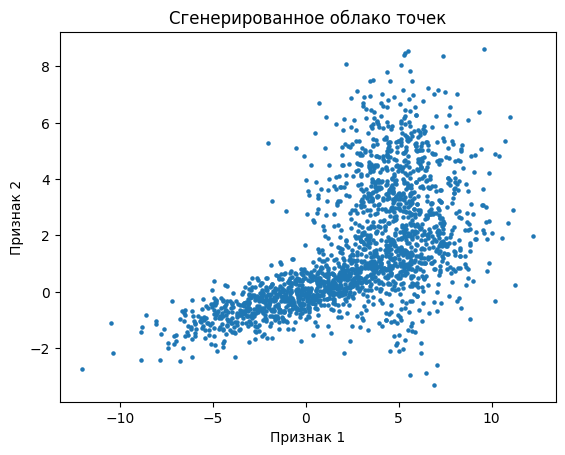

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Сгенерированное облако точек')
plt.show()

2. Обучить алгоритм EM-кластеризации (класс sklearn.mixture.GaussianMixture).

In [26]:
em = GaussianMixture(n_components=2, random_state=42).fit(X)

3. Вывести средние значения компонентов смеси (атрибут means_), веса (weights_), предсказанные метки, предсказанные вероятности и значения функции правдоподобия (методы score(), score_samples()). 

In [27]:
print("Средние значения компонентов смеси:", em.means_)
print("\nВеса:", em.weights_)
print("\nПредсказанные метки:", em.predict(X))
print("\nПредсказанные вероятности:", em.predict_proba(X))
print("\nЗначение функции правдоподобия:", em.score(X))
print("\nЗначение функции правдоподобия для каждой точки:", em.score_samples(X))

Средние значения компонентов смеси: [[-0.19927883 -0.03339559]
 [ 4.99928055  2.84629633]]

Веса: [0.48129072 0.51870928]

Предсказанные метки: [1 1 1 ... 0 0 0]

Предсказанные вероятности: [[2.43109060e-02 9.75689094e-01]
 [2.71655209e-01 7.28344791e-01]
 [1.48004714e-01 8.51995286e-01]
 ...
 [9.99867982e-01 1.32018199e-04]
 [9.90349829e-01 9.65017083e-03]
 [9.74429298e-01 2.55707017e-02]]

Значение функции правдоподобия: -4.336270890694417

Значение функции правдоподобия для каждой точки: [-5.17424267 -5.57151286 -4.38103979 ... -3.46767596 -3.6584665
 -3.28769856]


4. Вывести на диаграмме облако точек, раскрашенных в соответствии с присвоенными метками,  а  также  точки  с  координатами  средних  значений  (условные  центры). Проанализировать все полученные результаты.

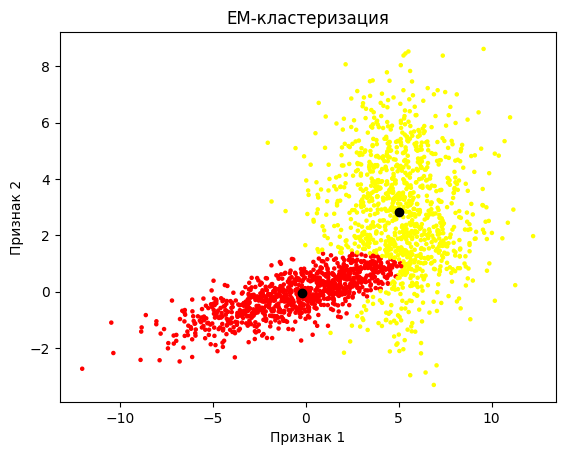

In [28]:
colors = ListedColormap(['red', 'yellow'])
plt.scatter(X[:, 0], X[:, 1], c=em.predict(X), s=5, cmap = colors)
plt.scatter(em.means_[:, 0], em.means_[:, 1], c='black')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title("EM-кластеризация")
plt.show()

Значение функции правдоподобия: -4.308125735826969 - это означает, что модель кластеризации имеет низкую вероятность правдоподобия, что может быть связано с тем, что данные были слишком разделимыми и не были хорошо отображены в некоторых кластерах.

При визуальном анализе можно отметить, что модель не идеально справляется с разделением точек данных на кластеры.

Исходя из метрик, можно предположить, что данные были успешно кластеризованы, но с некоторыми проблемами. Низкая вероятность правдоподобия может быть связана с тем, что данные были слишком разделимыми и не были хорошо отображены в некоторых кластерах. Это может привести к неправильному отнесению точек к группам.

5. Попытаться  решить  задачу  кластеризации  объектов  исходного  набора  данных  с помощью метода k-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


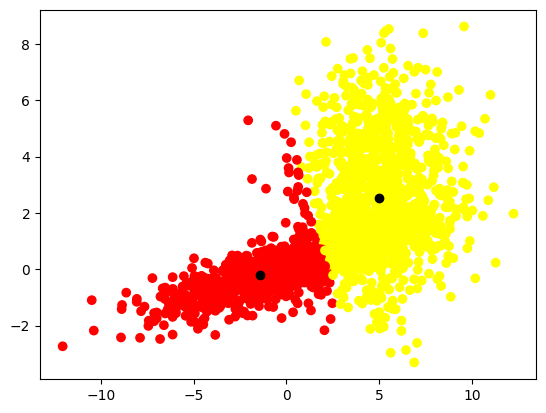

In [29]:
kmeans = KMeans(n_clusters=2, random_state = 10).fit(X)
colors = ListedColormap(['red', 'yellow'])
plt.scatter(X[:,0], X[:,1], cmap = colors, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")

6. Сравнить результаты кластеризации, выполненные EM-алгоритмом и методом k-means. Сделать выводы.

In [31]:
lables = kmeans.labels_
print("Однородность:", homogeneity_score(lables, np.concatenate((np.zeros(1000), np.ones(1000)))))
print("Полнота:", completeness_score(lables, np.concatenate((np.zeros(1000), np.ones(1000)))))
print("V-мера:", v_measure_score(lables, np.concatenate((np.zeros(1000), np.ones(1000)))))
print("ARI:", adjusted_rand_score(lables, np.concatenate((np.zeros(1000), np.ones(1000)))))
print("Силуэт:", silhouette_score(X, lables))

Однородность: 0.4368341993875012
Полнота: 0.42103160005575957
V-мера: 0.4287873512303619
ARI: 0.48000180680187665
Силуэт: 0.5188960678585649


Исходя из этих данных, можно предположить, что данные были успешно кластеризованы, но с некоторыми проблемами. Низкая однородность и полнота могут быть связаны с тем, что данные были слишком разделимыми. Это может привести к неправильному отнесению точек к группам. 

7. По результатампроведенного исследования оформить отчет.

Из результатов моделирования можно сделать вывод, что EM-алгоритм лучше, чем K-means. Вероятности для меток были более равномерно распределены, что может быть связано с тем, что EM-алгоритм учитывает веса для каждой точки при расчете вероятностей.

Средние значения кластеров  для EM-алгоритма были ближе к нулю, что может быть связано с тем, что EM-алгоритм учитывает веса для каждой точки при расчете средних значений кластеров.

Однако, метрики для K-means также были хорошими, что может быть связано с тем, что K-means учитывает расстояние между точками для определения границ меток. 

Таким образом, можно сделать вывод, что EM-алгоритм для определения границ меток был более эффективным, чем K-means. Однако, метрики для K-means также были хорошими, что может быть связано с тем, что K-means учитывает расстояние между точками для определения границ меток.